# Library Imports

In [1]:
# Importing necessary libraries
import praw  # Reddit API wrapper
import pandas as pd  # Data manipulation library
import numpy as np  # Numerical operations library
import re  # Regular expression operations
from textblob import TextBlob  # Text processing library for sentiment analysis
from wordcloud import WordCloud, STOPWORDS  # Library for generating word clouds
import seaborn as sns  # Data visualization library
import matplotlib.pyplot as plt  # Plotting library

# Reddit API Authentication

In [2]:
# Reddit API authentication
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="NkR2_4ZvcUgome9qE8XvdQ",  # Reddit client ID
    client_secret="oMvK9a5zyB_V-npDHPfw09kD3U_3jg",  # Reddit client secret
    user_agent=user_agent  # User agent for Reddit API
)

# Scraping Reddit Data

In [3]:
# Scraping Reddit data from the "Nasdaq" subreddit
headlines = set()
for submission in reddit.subreddit("Nasdaq").hot(limit=None):
    # Print details of each submission
    print(submission.title)  # Subreddit Title
    print(submission.id)  # ID
    print(submission.author)  # Author of the subreddit
    print(submission.created_utc)  # Date and time being created
    print(submission.score)  # Average Score
    print(submission.upvote_ratio)  # Upvote ratio
    print(submission.url)  # Link to the Subreddit
    break  # Stop after the first submission (for demonstration)
    headlines.add(submission.title)
print(len(headlines))

$LUNR Intuitive Machines is an interesting stock
1avqsg1
stenito
1708458292.0
2
1.0
https://www.reddit.com/r/nasdaq/comments/1avqsg1/lunr_intuitive_machines_is_an_interesting_stock/
0


# Creating DataFrame for Scraped Data

In [4]:
# Creating a DataFrame to store scraped data
headlines = set()
for submission in reddit.subreddit("Nasdaq").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))
Nasdaq_df = pd.DataFrame(headlines)
Nasdaq_df.columns = ['Titles']

928


# Text Data Cleaning

In [5]:
# Cleaning the text data
def cleanTxt(text):
    # Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Remove the '#' symbol
    text = re.sub(r'#', '', text)
    # Remove "RT" (retweet) tags
    text = re.sub(r'RT[\s]+', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text)
    # Remove colons
    text = re.sub(r':', '', text)
    return text

#Cleaning the text
Nasdaq_df["Titles"]= Nasdaq_df["Titles"].apply(cleanTxt)

#Show the clean text
Nasdaq_df.head()

,Titles
0,Plug Power Creating a Path for Global Green Hy...
1,Mangoceuticals Inc (NASDAQMGRX) launches “Make...
2,E-mini NASDAQ scalping
3,Stock Futures Rise Ahead Of Inflation Data (PE...
4,Jeff Bezos sells $2 billion worth of Amazon sh...


# Removing Emojis and Unicode Characters

In [6]:
# Removing emojis and Unicode characters
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

Nasdaq_df["Titles"]= Nasdaq_df["Titles"].apply(remove_emoji)

#Show the clean text
Nasdaq_df.head()

,Titles
0,Plug Power Creating a Path for Global Green Hy...
1,Mangoceuticals Inc (NASDAQMGRX) launches “Make...
2,E-mini NASDAQ scalping
3,Stock Futures Rise Ahead Of Inflation Data (PE...
4,Jeff Bezos sells $2 billion worth of Amazon sh...


# Sentiment Analysis Functions Definition

In [7]:
# Define the functions for sentiment analysis
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Applying Sentiment Analysis

In [8]:
# Sentiment analysis
Nasdaq_df['Subjectivity'] = Nasdaq_df['Titles'].apply(getSubjectivity)
Nasdaq_df['Polarity'] = Nasdaq_df['Titles'].apply(getPolarity)

#Now display data
Nasdaq_df.head()

,Titles,Subjectivity,Polarity
0,Plug Power Creating a Path for Global Green Hy...,0.150000,-0.100000
1,Mangoceuticals Inc (NASDAQMGRX) launches “Make...,0.541667,-0.291667
2,E-mini NASDAQ scalping,0.000000,0.000000
3,Stock Futures Rise Ahead Of Inflation Data (PE...,0.000000,0.000000
4,Jeff Bezos sells $2 billion worth of Amazon sh...,0.100000,0.300000


# Categorizing Sentiment Scores

In [9]:
# Grouping polarity into categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

Nasdaq_df["Insight"] = Nasdaq_df["Polarity"].apply(getInsight)

Nasdaq_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Plug Power Creating a Path for Global Green Hy...,0.150000,-0.100000,Negative
1,Mangoceuticals Inc (NASDAQMGRX) launches “Make...,0.541667,-0.291667,Negative
2,E-mini NASDAQ scalping,0.000000,0.000000,Neutral
3,Stock Futures Rise Ahead Of Inflation Data (PE...,0.000000,0.000000,Neutral
4,Jeff Bezos sells $2 billion worth of Amazon sh...,0.100000,0.300000,Positive
5,Kaival Brands’ Senior Leadership Attending NAC...,0.000000,0.000000,Neutral
6,BreakingNews Powerbridge Technologies $PBTS St...,0.500000,0.250000,Positive
7,RGC - Micro Cap Stock Run,0.000000,0.000000,Neutral
8,"CATHETER PRECISION, INC. (VTAK) Reports Unaudi...",0.275000,0.175000,Positive
9,Artificial Intelligence (AI) and Cloud Transfo...,0.727273,-0.231818,Negative


# Visualizing Sentiment Scores

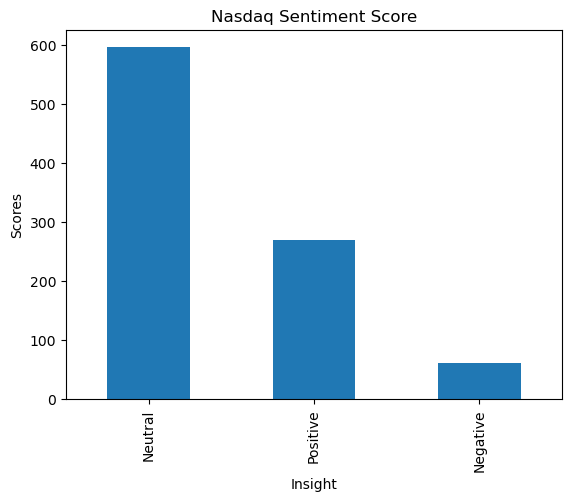

In [10]:
# Visualizing sentiment scores
plt.title("Nasdaq Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
Nasdaq_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Generating Word Cloud

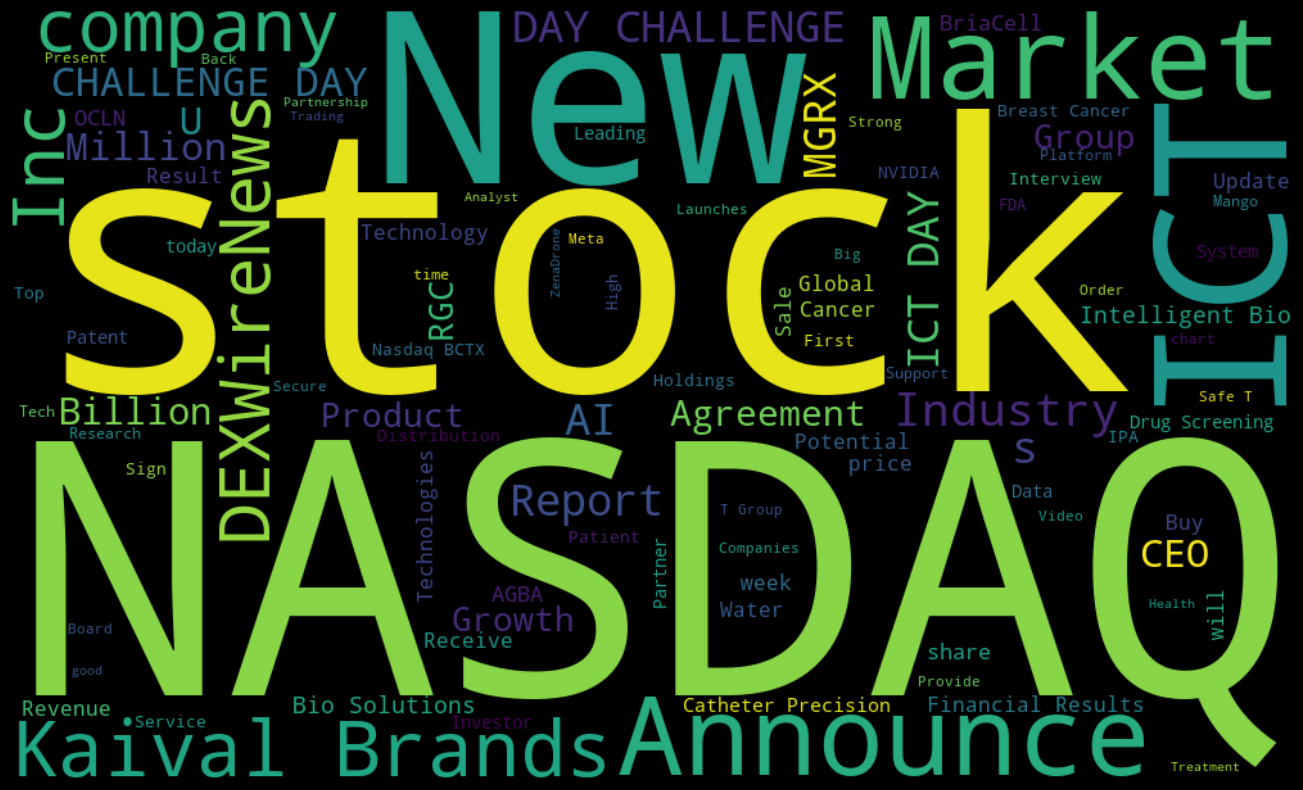

In [11]:
# Generating a word cloud
text = ' '.join( [twts for twts in Nasdaq_df['Titles']] )
wordcloud = WordCloud(width=1000, height = 600,
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()